# **EXERCISE 1**

In [6]:
import numpy as np
import pandas as pd

## **Importing Dataset**

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

d:\Miniconda3\envs\machine_learning\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## **Spliting Dataset in Train and Test Set**

In [9]:
X = mnist['data']
y = mnist['target']
X = X.iloc[:,:].values
y = y.iloc[:].values

In [10]:
y = y.astype(np.uint8)
X[0],y[0]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [11]:
X_train,X_test,y_train,y_test = X[:60000,:], X[60000:,:], y[:60000],y[60000:]

## **Training using KNeighbour Classifier**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier_1 = KNeighborsClassifier()
classifier_1.fit(X_train,y_train)

KNeighborsClassifier()

## **Performance Measures**

In [32]:
classifier.predict([X[0]])

array([5], dtype=uint8)

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier_1,X_train,y_train,cv=4,scoring='accuracy')

array([0.96846667, 0.9698    , 0.968     , 0.9674    ])

**Nice Accuracy but We want Above 97% Accuracy, So How to Improve it ?**
- A Way is to Manipulate Hyperparameters of KNeighbour, so let do it.


## **Improving Performance using Hyperparameter Tuning**

### **Using GridSearchCV**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameter_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

classifier_2 = KNeighborsClassifier()
grid_search = GridSearchCV(classifier_2, parameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  14.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  10.3s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   9.3s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   9.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  11.1s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  11.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=   9.5s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   8.7s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   9.2s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  11.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  10.8s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [20]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [21]:
grid_search.best_score_

0.9716166666666666

**Finally Above 97% Accuracy**

**Now We should use our Test Set for Actual Prediction and Look at the Accuracy on It**

In [22]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

**Looking at Above Accuracy Score we can Say that out Model Accomplishes 97% Accuracy**

# **EXERCISE 2**

## **Function to Shift Image in Any Direction**

In [12]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

C:\Users\surya\AppData\Local\Temp\ipykernel_24320\2707933203.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


## **Example of Shifting Image**

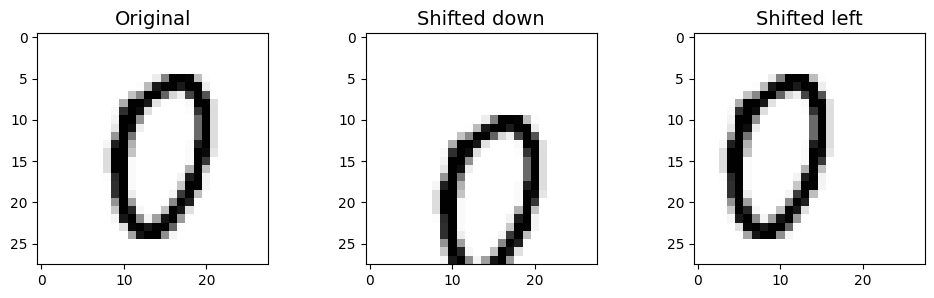

In [15]:
import matplotlib.pyplot as plt
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

## **Dataset Augumentation or Training Set Expansion**

**Augumentation -> In this process we expand our Training Set using Available Data. Here we are Expanding it by Adding 4 Copies Image Shifted in 4 Directions**

In [16]:
X_train_aug = [image for image in X_train]
y_train_aug = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_aug.append(shift_image(image, dx, dy))
        y_train_aug.append(label)

X_train_augmented = np.array(X_train_aug)
y_train_augmented = np.array(y_train_aug)

In [23]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

## **Training the Model of Exercise 1 using Augumented Training Dataset**

In [25]:
classifier_3 = KNeighborsClassifier(**grid_search.best_params_)

In [27]:
classifier_3.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [29]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [30]:
y_pred = classifier_3.predict(X_test)
accuracy_score(y_test,y_pred)

0.9763

- **That Right By using Augumentation only the Accuracy Improved by 0.5%**
**Great!**